# Titanic Survival prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.feature_selection import mutual_info_classif

In [4]:
os.getcwd()

'C:\\Users\\himanshu'

In [5]:
os.chdir('C:\\Users\\himanshu\\Desktop')


In [6]:
data=pd.read_csv("tested.csv")


In [7]:
   data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
data.dropna(inplace=True)

In [10]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [11]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [12]:
data_encoded = data.copy()

In [13]:
data_encoded = pd.get_dummies(data_encoded, columns=['Sex'], drop_first=True)


In [14]:
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

In [15]:
information_gain = mutual_info_classif(X, y)
print("Information Gain for each feature:")
print(dict(zip(X.columns, information_gain)))

Information Gain for each feature:
{'Pclass': 0.0, 'Age': 0.0, 'SibSp': 0.019799728240417203, 'Parch': 0.019909197315403304, 'Fare': 0.0, 'Sex_male': 0.6988612797157616}


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
for num_features in range(1, len(X.columns) + 1):
     selected_features = X.columns[np.argsort(information_gain)[::-1][:num_features]]
    

In [18]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
precision = precision_score(y_test, y_pred)
print(f"Number of Features: {num_features}, Precision: {precision}")

Number of Features: 6, Precision: 0.9


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

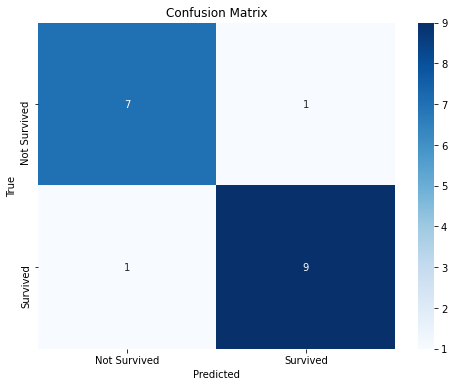

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()